In [10]:
import shap
import sklearn.neural_network
import matplotlib.pyplot as plt
import random
import numpy as np
import pandas as pd
import sys
sys.path.append("../../../")

def load_data(filepath,count=None):
    X,Y = [],[]
    df = pd.read_csv(filepath)
    for i in range(len(df)):
        obs = df.iloc[i, 0:-1].to_dict()
        label = df.iloc[i, -1]
        X.append(list(obs.values()))
        Y.append(label)
        feature_names = list(obs.keys())
    print(feature_names)
    if count is None:
        count = len(X)
    #随机打乱
    index = [i for i in range(len(X))]
    random.shuffle(index)
    X = np.array(X)[index]
    Y = np.array(Y)[index]
    return X[:count],Y[:count],feature_names

X,Y,feature_names = load_data("./cache.csv")
actions = ["IDLE","L1","L2","L3"]
t = []
for i in Y:
    t.append(actions.index(i))
model = sklearn.neural_network.MLPClassifier().fit(X,t)




['es_load', 'free_storage_size_ratio_L1', 'free_storage_size_ratio_L2', 'free_storage_size_ratio_L3', 'can_L1_fit', 'can_L2_fit', 'can_L3_fit', 'service_size', 'estimated_fetch_time', 'is_popular', 'charm', 'service_request_frequency', 'nearby_servers_count', 'cached_in_nearby_servers', 'es_request_frequency']


## idle

Permutation explainer:  98%|█████████▊| 2051/2100 [02:15<00:03, 15.55it/s]divide by zero encountered in log
invalid value encountered in double_scalars
invalid value encountered in double_scalars
divide by zero encountered in log
invalid value encountered in double_scalars
invalid value encountered in double_scalars
divide by zero encountered in log
invalid value encountered in double_scalars
invalid value encountered in double_scalars
divide by zero encountered in log
invalid value encountered in double_scalars
divide by zero encountered in log
invalid value encountered in double_scalars
invalid value encountered in double_scalars
divide by zero encountered in log
invalid value encountered in double_scalars
divide by zero encountered in log
invalid value encountered in double_scalars
invalid value encountered in double_scalars
divide by zero encountered in log
invalid value encountered in double_scalars
invalid value encountered in double_scalars
divide by zero encountered in log
inva

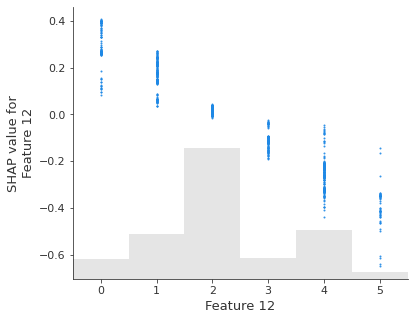

In [13]:
# compute SHAP values
explainer = shap.Explainer(lambda x: model.predict_log_proba(x)[:,0], X)
shap_values = explainer(X[:-200])

shap.plots.scatter(shap_values[:,-3],alpha=0.9, dot_size=4, x_jitter=0)
data = shap_values[:,-3].data
values = shap_values[:,-3].values

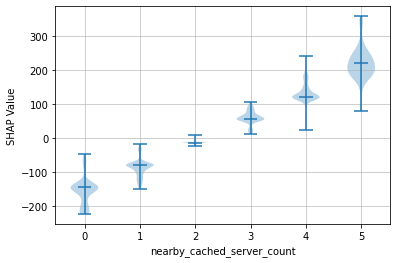

In [15]:
all_data = [[] for _ in range(6)]
#同时遍历data和values
for i,t in enumerate(data):
    #遇到nan值跳过
    if np.isnan(values[i]):
        continue
    all_data[int(t)].append(values[i]*-550)

# plot violin plot
plt.violinplot(all_data,
                  showmeans=False,
                  showmedians=True)
plt.xlabel("nearby_cached_server_count")
plt.ylabel("SHAP Value")
plt.xticks([1,2,3,4,5,6],["0","1","2","3","4","5"])
plt.grid(axis='y', alpha=0.75)
plt.grid(axis='x', alpha=0.75)
plt.savefig("./screenshot/idle.png",dpi=150)
plt.show()

## L1

Permutation explainer: 201it [00:12,  3.59it/s]                         


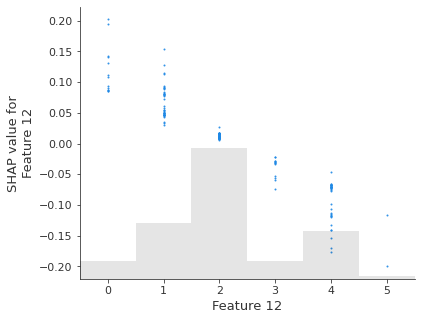

In [16]:
# compute SHAP values
explainer = shap.Explainer(lambda x: model.predict_log_proba(x)[:,1], X)
shap_values = explainer(X[:200])

shap.plots.scatter(shap_values[:,-3],alpha=0.9, dot_size=4, x_jitter=0)
data = shap_values[:,-3].data
values = shap_values[:,-3].values

[[], [], [], [], [], []]


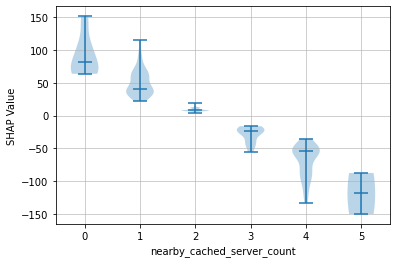

In [18]:
all_data = [[] for _ in range(6)]
print(all_data)
#同时遍历data和values
for i,t in enumerate(data):
    #遇到nan值跳过
    if np.isnan(values[i]):
        continue
    all_data[int(t)].append(values[i]*750)

# plot violin plot
plt.violinplot(all_data,
                  showmeans=False,
                  showmedians=True)
plt.xlabel("nearby_cached_server_count")
plt.ylabel("SHAP Value")
plt.xticks([1,2,3,4,5,6],["0","1","2","3","4","5"])
plt.grid(axis='y', alpha=0.75)
plt.grid(axis='x', alpha=0.75)
plt.savefig("./screenshot/B.png",dpi=150)
plt.show()

## L2

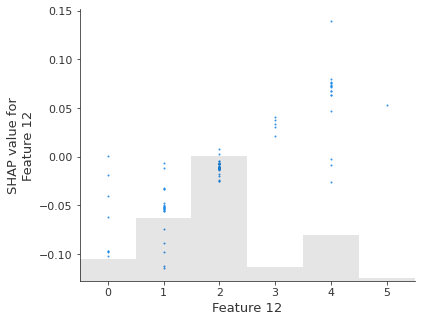

[[], [], [], [], [], []]


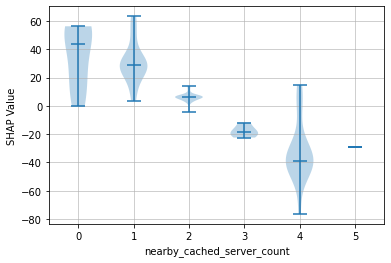

In [9]:
# compute SHAP values
explainer = shap.Explainer(lambda x: model.predict_log_proba(x)[:,2], X)
shap_values = explainer(X[:100])

shap.plots.scatter(shap_values[:,-3],alpha=0.9, dot_size=4, x_jitter=0)
data = shap_values[:,-3].data
values = shap_values[:,-3].values
all_data = [[] for _ in range(6)]
print(all_data)
#同时遍历data和values
for i,t in enumerate(data):
    #遇到nan值跳过
    if np.isnan(values[i]):
        continue
    all_data[int(t)].append(values[i]*-550)

# plot violin plot
plt.violinplot(all_data,
                  showmeans=False,
                  showmedians=True)
plt.xlabel("nearby_cached_server_count")
plt.ylabel("SHAP Value")
plt.xticks([1,2,3,4,5,6],["0","1","2","3","4","5"])
plt.grid(axis='y', alpha=0.75)
plt.grid(axis='x', alpha=0.75)
plt.savefig("./screenshot/L3.png",dpi=150)
plt.show()